# QCTO - Workplace Module 

### Project Title: Flight Predictions
#### Done By: Kimaya Setty

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling and Evaluation </a>

<a href=#seven>7. Cross-Validation for Robust Evaluation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the project, describe its objectives, and highlight its importance.
* **Details:** Offer background on the problem domain by outlining the main objectives or challenges the project aims to address. Include any relevant context or information that helps clarify the project's purpose and define its overall scope.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** Import all necessary Python libraries that will be used in the project, including packages like Pandas for data handling, Matplotlib and Seaborn for visualizations, and scikit-learn for building and evaluating machine learning models.
---

In [1]:
!pip install xgboost > nul 2>&1
!pip install folium
!pip install pycountry
!pip install pycountry_convert

In [1]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd    # For data manipulation and analysis.
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns  # Built on top of Matplotlib, Seaborn simplifies the creation of attractive and informative statistical graphics.
import numpy as np  # For numerical computations.
import re  # For regular expressions, used in text data preprocessing to search, match, and manipulate strings.
import string # Provides constants like string.punctuation and utility functions for working with strings.
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer # Converts text data into numerical feature vectors using the Term Frequency-Inverse Document Frequency (TF-IDF) technique.
from sklearn.model_selection import train_test_split # Splits the dataset into training and testing subsets.
from sklearn.linear_model import LogisticRegression # Implements Logistic Regression, a commonly used supervised learning algorithm for classification tasks.
from sklearn.naive_bayes import MultinomialNB # Implements the Multinomial Naive Bayes algorithm, often used for text classification.
from sklearn.svm import SVC # Implements Support Vector Classifier (SVC), a powerful supervised learning model for classification.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Provides functions to evaluate the performance of machine learning models
from sklearn.model_selection import GridSearchCV # Performs hyperparameter tuning by evaluating a grid of parameter combinations using cross-validation.
from sklearn.model_selection import cross_val_score # Computes cross-validated scores for assessing model performance.
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib # Used for saving and loading machine learning models or large datasets efficiently.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import joblib
from IPython.display import display
import warnings
# Hide all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

# Data Collection Details  
- **Source**: The dataset is sourced from Kaggle and can be accessed [here](https://www.kaggle.com/datasets/jinbonnie/airport-information).  


## Dataset Description  
This dataset contains the list of all airport codes, the attributes are identified in data package description. Some of the columns contain attributes identifying airport locations, other codes (IATA, local if exist) that are relevant to identification of an airport.

### Airport 
| Feature Name      | Description  |
|------------------|-------------|
| **ID**    | Internal OurAirports integer identifier for the airport. This will stay persistent, even if the airport code changes.  |
| **Ident**   | The text identifier used in the OurAirports URL. This will be the ICAO code if available. Otherwise, it will be a local airport code (if no conflict), or if nothing else is available, an internally-generated code starting with the ISO2 country code, followed by a dash and a four-digit number. |
| **Type**      | The type of the airport. Allowed values are "closed_airport", "heliport", "large_airport", "medium_airport", "seaplane_base", and "small_airport". See the map legend for a definition of each type.  |
| **Name**    | The official airport name, including "Airport", "Airstrip", etc.  |
| **Latitude deg**  | The airport latitude in decimal degrees (positive for north).  |
| **Longitude deg**    | The airport longitude in decimal degrees (positive for east).  |
| **Elevation ft**       | The airport elevation MSL in feet (not metres).  |
| **Continent**          | The code for the continent where the airport is (primarily) located. Allowed values are "AF" (Africa), "AN" (Antarctica), "AS" (Asia), "EU" (Europe), "NA" (North America), "OC" (Oceania), or "SA" (South America).  |
| **iso_country**       | The two-character ISO 3166:1-alpha2 code for the country where the airport is (primarily) located. A handful of unofficial, non-ISO codes are also in use, such as "XK" for Kosovo. Points to the code column in countries.csv.  |
| **iso_region**      | An alphanumeric code for the high-level administrative subdivision of a country where the airport is primarily located (e.g. province, governorate), prefixed by the ISO2 country code and a hyphen. OurAirports uses ISO 3166:2 codes whenever possible, preferring higher administrative levels, but also includes some custom codes. See the documentation for regions.csv.  |
| **municipality** | The primary municipality that the airport serves (when available). Note that this is not necessarily the municipality where the airport is physically located.  |
| **Scheduled Service**    | "yes" if the airport currently has scheduled airline service; "no" otherwise.  |
| **GPS code** | The code that an aviation GPS database (such as Jeppesen's or Garmin's) would normally use for the airport. This will always be the ICAO code if one exists. Note that, unlike the ident column, this is not guaranteed to be globally unique.  |
| **local_code** | The local country code for the airport, if different from the gps_code and iata_code fields (used mainly for US airports).  |

### Frequency
| Feature Name      | Description  |
|------------------|-------------|
| **ID**    | Internal OurAirports integer identifier for the frequency. This will stay persistent, even if the radio frequency or description changes.  |
| **Airport ref**   |  Internal integer foreign key matching the id column for the associated airport in airports.csv. (airport_ident is a better alternative.) |
| **Airport ident**      | Externally-visible string foreign key matching the ident column for the associated airport in airports.csv.  |
| **Type**    | A code for the frequency type. This isn't (currently) a controlled vocabulary, but probably will be soon. Some common values are "TWR" (tower), "ATF" or "CTAF" (common traffic frequency), "GND" (ground control), "RMP" (ramp control), "ATIS" (automated weather), "RCO" (remote radio outlet), "ARR" (arrivals), "DEP" (departures), "UNICOM" (monitored ground station), and "RDO" (a flight-service station).  |
| **Description**  | A description of the frequency, typically the way a pilot would open a call on it.  |
| **Frequency mhz**    | Radio voice frequency in megahertz. Note that the same frequency may appear multiple times for an airport, serving different functions.  |


## Usage  
This dataset is valuable for:  
- **Exploratory Data Analysis (EDA)**: Understanding airports and their radio frquencies.  
- **Machine Learning**: Developing predictive models to **predict airport types** or **predict radio frquency used by an airport** based on the provided features.  

By leveraging this dataset, financial institutions can gain **data-driven insights** to enhance customer retention strategies and optimize business decisions.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Present the code used to import the data and display the initial rows, providing an overview of the raw data structure.
---

In [2]:
#Please use code cells to code in and do not forget to comment your code.
df_freq = pd.read_csv('airport_frequencies.csv')
display(df_freq.head())
df = pd.read_csv('airport_code.csv')
display(df.head())

,id,airport_ref,ident,type,description,frequency_mhz
0,70518,6528,00CA,CTAF,CTAF,122.9
1,307581,6589,01FL,ARCAL,NaN,122.9
2,75239,6589,01FL,CTAF,CEDAR KNOLL TRAFFIC,122.8
3,60191,6756,04CA,CTAF,CTAF,122.9
4,59287,6779,04MS,UNIC,UNICOM,122.8


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,00AA
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,00AL
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Outline the steps taken to clean the data, including how missing values were addressed, outliers removed, and errors corrected. If applicable, describe any data reduction techniques used, such as filtering by specific features or criteria.
---

In [4]:
display(df.info())
display(df_freq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58505 entries, 0 to 58504
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 58505 non-null  int64  
 1   ident              58505 non-null  object 
 2   type               58505 non-null  object 
 3   name               58505 non-null  object 
 4   latitude_deg       58505 non-null  float64
 5   longitude_deg      58505 non-null  float64
 6   elevation_ft       50054 non-null  float64
 7   continent          58504 non-null  object 
 8   iso_country        58259 non-null  object 
 9   iso_region         58505 non-null  object 
 10  municipality       52634 non-null  object 
 11  scheduled_service  58505 non-null  object 
 12  gps_code           41709 non-null  object 
 13  local_code         30482 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28921 entries, 0 to 28920
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28921 non-null  int64  
 1   airport_ref    28921 non-null  int64  
 2   ident          28921 non-null  object 
 3   type           28921 non-null  object 
 4   description    28047 non-null  object 
 5   frequency_mhz  28921 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


None

In [5]:
display(type(df))
display(type(df_freq))

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [3]:
import pycountry
import pycountry_convert as pc
pc.country_alpha2_to_continent_code

def extract_iso_country(region_code):
    if pd.isna(region_code) or '-' not in region_code:
        return None
    return region_code.split('-')[0]

def get_continent_code_from_alpha2(alpha2):
    try:
        if pd.isna(alpha2):
            return None
        return pc.country_alpha2_to_continent_code(alpha2)
    except Exception:
        return None

df[['iso_country']].fillna(df['iso_region'].apply(extract_iso_country))

df['continent'] = df['continent'].fillna(df['iso_country'].apply(get_continent_code_from_alpha2))

display(df.isnull().sum())
display(df.head())

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft          8451
continent                1
iso_country            246
iso_region               0
municipality          5871
scheduled_service        0
gps_code             16796
local_code           28023
dtype: int64

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NA,US,US-PA,Bensalem,no,00A,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NA,US,US-KS,Leoti,no,00AA,00AA
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NA,US,US-AK,Anchor Point,no,00AK,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NA,US,US-AL,Harvest,no,00AL,00AL
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NA,US,US-AR,Newport,no,NaN,NaN


In [4]:
#write to csv
df.to_csv('airport_code_clean.csv', index=False)
df_freq.to_csv('airport_frequencies_clean.csv', index=False)


In [5]:
# Remove irrelevant columns
df.drop(['municipality', 'gps_code', 'local_code'], axis=1, inplace=True)
df_freq.drop(['description'], axis=1, inplace=True)
df.dropna(inplace=True)

In [6]:
display(df.isnull().sum())
display(df_freq.isnull().sum())
display(df.head())
display(df_freq.head())

id                   0
ident                0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
scheduled_service    0
dtype: int64

id               0
airport_ref      0
ident            0
type             0
frequency_mhz    0
dtype: int64

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,scheduled_service
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NA,US,US-PA,no
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NA,US,US-KS,no
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NA,US,US-AK,no
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NA,US,US-AL,no
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NA,US,US-AR,no


,id,airport_ref,ident,type,frequency_mhz
0,70518,6528,00CA,CTAF,122.9
1,307581,6589,01FL,ARCAL,122.9
2,75239,6589,01FL,CTAF,122.8
3,60191,6756,04CA,CTAF,122.9
4,59287,6779,04MS,UNIC,122.8


In [13]:
#Look for categorical data
display(df['continent'].unique())
display(df['type'].unique())
display(df['scheduled_service'].unique())

display(df_freq['ident'].unique())
display(df_freq['type'].unique())

array(['NA', 'OC', 'AF', 'AS', 'EU', 'SA', 'AN'], dtype=object)

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['00CA', '01FL', '04CA', ..., 'ZYTL', 'ZYTX', 'ZYYJ'], dtype=object)

array(['CTAF', 'ARCAL', 'UNIC', 'APP', 'GND', 'TWR', 'CNTR', 'ARTC',
       'MISC', 'A/D', 'MULT', 'A/G', 'ATIS', 'INFO', 'OPS', 'PMSV',
       'APP/DEP', 'AWOS', 'UNICOM', 'FSS', 'RDO', 'CLD',
       'Woodlands Adviso', 'AFIS', 'COM', 'Non controlled', 'ctaf', 'FIA',
       'Ciljuge Info', 'HIS', 'ATS', 'ACC', 'RDR', 'DEP', 'afis',
       'TWR: BIRK', 'TRFC', 'RMP', 'MF', 'ATF', 'VFR Advisory', 'CPR1',
       'Ground', 'AAS', 'RCO', 'CTAF(R)', 'Departures', 'Ctaf', 'MIL',
       'ARR/DEP', 'CLNC DEL', 'tfc', 'UNICOM ltd hrs O', 'TOWER', 'TFC',
       'TCA', 'ASOS', 'Unicom', 'Ambulance Dispat', 'Advisory', 'Gliding',
       'Vhf', 'ARR', 'RADIO', 'PAL', 'VDF', 'APRON ADV', 'INTL AIR',
       'PVT ADV', 'EMR', 'TML', 'LWIS', 'MF/RDO', 'RCO. Bcst', 'APRON',
       'VFR ADV', 'APRT RDO', 'FBO', 'PAD', 'info', 'Info', 'Dolmar INFO',
       'Gössenheim INFO', 'DIR', '131.7', 'SAB - VOR', 'ENG VOR',
       'ILS - IEN', 'GCA', 'FIS', 'PTD', 'Schaffen Radio', 'GE', 'POST',
       'EDFG', 'TOW

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Explore the dataset using both statistical summaries and visual tools such as histograms, box plots, scatter plots, and correlation heatmaps. Highlight and interpret any key patterns, trends, or outliers that emerge from the analysis.
---

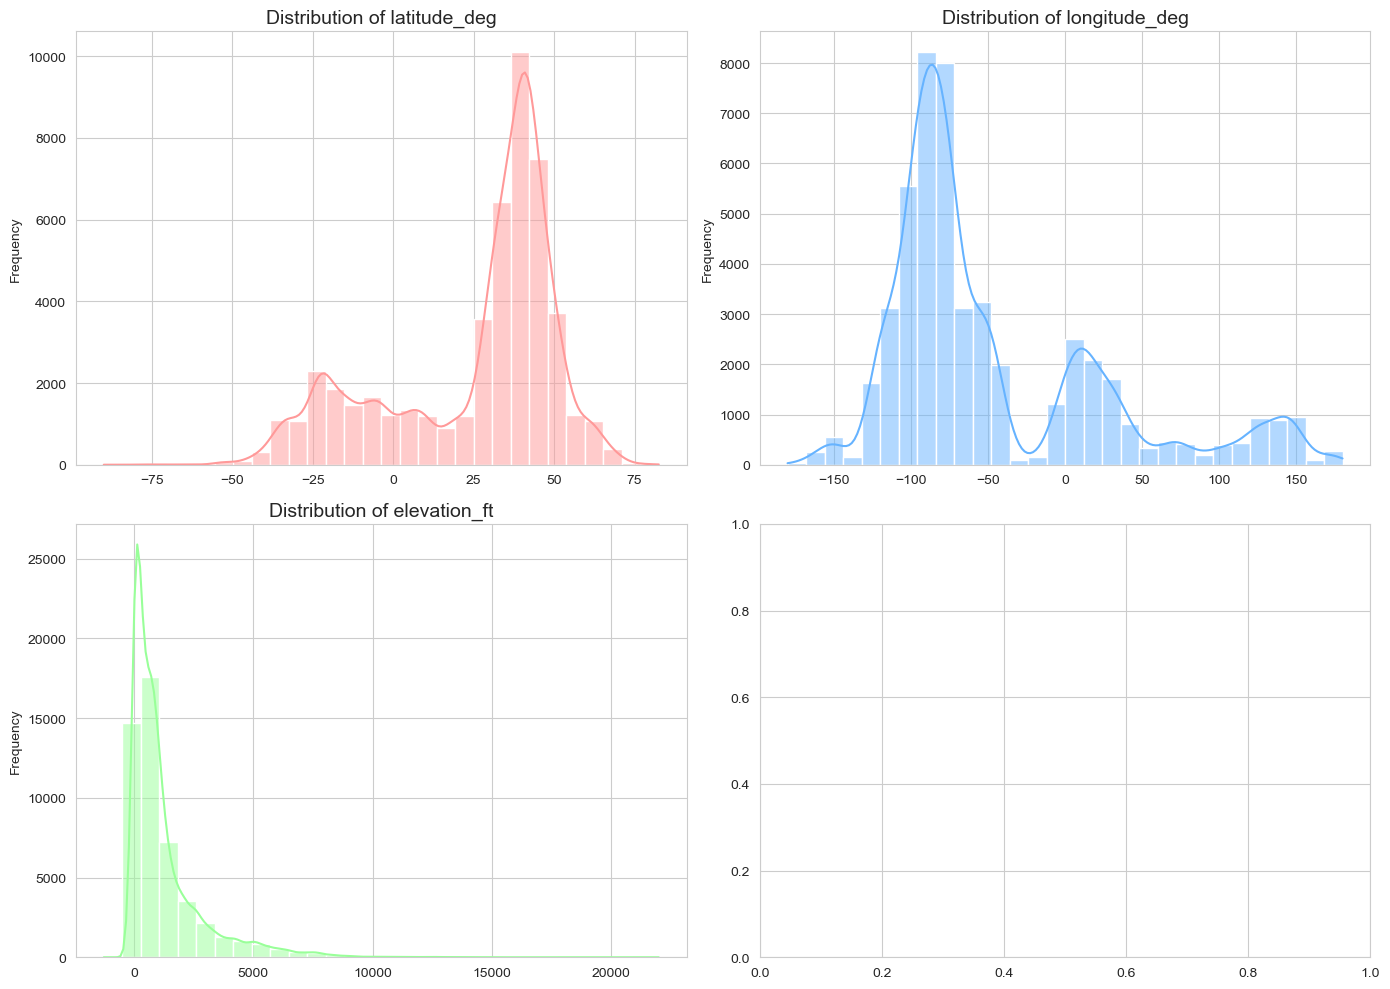

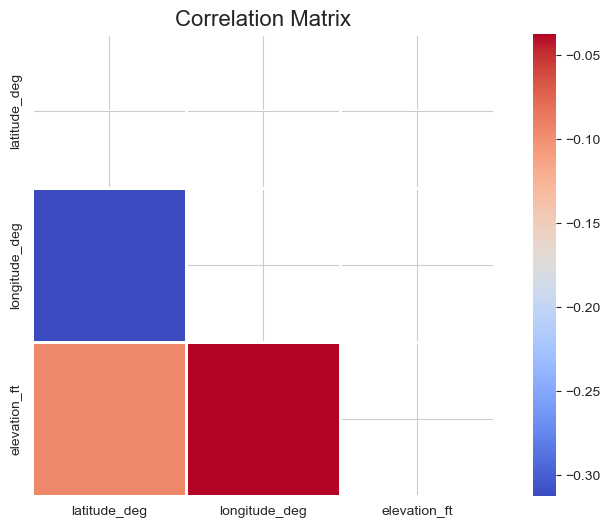

In [7]:
df_plot = df[['latitude_deg', 'longitude_deg', 'elevation_ft']]


# Set a modern seaborn style for better aesthetics
sns.set_style("whitegrid")

# --- Histograms with different colors ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 subplot grid
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Different colors for variety

for ax, col, color in zip(axes.flatten(), df_plot.columns, colors):
    sns.histplot(df_plot[col], bins=30, kde=True, color=color, ax=ax)  # KDE added for smoothness
    ax.set_title(f'Distribution of {col}', fontsize=14)  # Set title
    ax.set_xlabel('')  # Remove x-label for clarity
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# --- Correlation Matrix with Mask ---
plt.figure(figsize=(10, 6))
corr = df_plot.corr()  # Compute correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask to hide duplicate values
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, mask=mask, square=True)
plt.title('Correlation Matrix', fontsize=16)  # Add title
plt.show()

In [8]:
import folium
from folium.plugins import HeatMap

# Drop rows with missing values in the required columns
df_map = df[['latitude_deg', 'longitude_deg', 'elevation_ft']].dropna()

# Create a folium map centered on average lat/lon
m = folium.Map(
    location=[df_map['latitude_deg'].mean(), df_map['longitude_deg'].mean()],
    zoom_start=4
)

# Prepare heat data: [lat, lon, elevation]
heat_data = df_map[['latitude_deg', 'longitude_deg', 'elevation_ft']].values.tolist()

# Add heatmap layer with elevation as intensity
HeatMap(heat_data, radius=10, max_zoom=13).add_to(m)

# Save and show
m.save('heatmap.html')
m


---
<a href=#six></a>
## **Modeling and Evaluation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Provide an overview of the selected models, the reasoning behind your feature selection and engineering steps, and explain how each model was trained. Be sure to include code snippets for setting up the models, along with clear explanations of the key parameters used.
---

In [12]:
# Merge on ident ↔ airport_ident
df_merged = pd.merge(
    df,
    df_freq,
    how='left',  # or 'inner' if you only want matches
    left_on=['id','ident'],
    right_on=['airport_ref','ident']
)

#field rename
df_merged.rename(columns={
    'id_x': 'airport_id',
    'id_y': 'frequency_id',
    'type_x': 'airport_type',
    'type_y': 'frequency_type',
    'description': 'frequency_description',
    'frequency_mhz': 'radio_frequency_mhz',
    'ident': 'airport_code',
    # Add more as needed
}, inplace=True)


# Preview
display(df_merged)

,airport_id,airport_code,airport_type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,scheduled_service,frequency_id,airport_ref,frequency_type,radio_frequency_mhz
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NA,US,US-PA,no,NaN,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NA,US,US-KS,no,NaN,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NA,US,US-AK,no,NaN,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NA,US,US-AL,no,NaN,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NA,US,US-AR,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,27244,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,AS,CN,CN-22,yes,51190.0,27244.0,TWR,130.0
66709,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,yes,NaN,NaN,NaN,NaN
66710,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,no,NaN,NaN,NaN,NaN
66711,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,no,NaN,NaN,NaN,NaN


In [13]:
# Encode categorical variables
df_training = pd.get_dummies(df_merged, columns=['continent', 'scheduled_service'], drop_first=True)
display(df_training)

,airport_id,airport_code,airport_type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,iso_region,frequency_id,airport_ref,frequency_type,radio_frequency_mhz,continent_AN,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA,scheduled_service_yes
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US,US-PA,NaN,NaN,NaN,NaN,False,False,False,True,False,False,False
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US,US-KS,NaN,NaN,NaN,NaN,False,False,False,True,False,False,False
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,US,US-AK,NaN,NaN,NaN,NaN,False,False,False,True,False,False,False
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US,US-AL,NaN,NaN,NaN,NaN,False,False,False,True,False,False,False
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US,US-AR,NaN,NaN,NaN,NaN,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,27244,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,CN,CN-22,51190.0,27244.0,TWR,130.0,False,True,False,False,False,False,True
66709,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,CN,CN-21,NaN,NaN,NaN,NaN,False,True,False,False,False,False,True
66710,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,GB,GB-ENG,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False
66711,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,TF,TF-U-A,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False


In [14]:
df_training.drop(['airport_code', 'name', 'frequency_type', 'iso_country', 'iso_region'], axis=1, inplace=True)

display(df_training)

,airport_id,airport_type,latitude_deg,longitude_deg,elevation_ft,frequency_id,airport_ref,radio_frequency_mhz,continent_AN,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA,scheduled_service_yes
0,6523,heliport,40.070801,-74.933601,11.0,NaN,NaN,NaN,False,False,False,True,False,False,False
1,323361,small_airport,38.704022,-101.473911,3435.0,NaN,NaN,NaN,False,False,False,True,False,False,False
2,6524,small_airport,59.949200,-151.695999,450.0,NaN,NaN,NaN,False,False,False,True,False,False,False
3,6525,small_airport,34.864799,-86.770302,820.0,NaN,NaN,NaN,False,False,False,True,False,False,False
4,6526,closed,35.608700,-91.254898,237.0,NaN,NaN,NaN,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,27244,medium_airport,42.882801,129.451004,624.0,51190.0,27244.0,130.0,False,True,False,False,False,False,True
66709,317861,medium_airport,40.542524,122.358600,0.0,NaN,NaN,NaN,False,True,False,False,False,False,True
66710,46378,heliport,51.894444,1.482500,40.0,NaN,NaN,NaN,False,False,True,False,False,False,False
66711,307326,small_airport,-11.584278,47.296389,11.0,NaN,NaN,NaN,False,False,False,False,False,False,False


In [15]:
# Remove duplicates
df_training.drop_duplicates(inplace=True)
display(df_training)
display(df_training.isnull().sum())

,airport_id,airport_type,latitude_deg,longitude_deg,elevation_ft,frequency_id,airport_ref,radio_frequency_mhz,continent_AN,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA,scheduled_service_yes
0,6523,heliport,40.070801,-74.933601,11.0,NaN,NaN,NaN,False,False,False,True,False,False,False
1,323361,small_airport,38.704022,-101.473911,3435.0,NaN,NaN,NaN,False,False,False,True,False,False,False
2,6524,small_airport,59.949200,-151.695999,450.0,NaN,NaN,NaN,False,False,False,True,False,False,False
3,6525,small_airport,34.864799,-86.770302,820.0,NaN,NaN,NaN,False,False,False,True,False,False,False
4,6526,closed,35.608700,-91.254898,237.0,NaN,NaN,NaN,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,27244,medium_airport,42.882801,129.451004,624.0,51190.0,27244.0,130.0,False,True,False,False,False,False,True
66709,317861,medium_airport,40.542524,122.358600,0.0,NaN,NaN,NaN,False,True,False,False,False,False,True
66710,46378,heliport,51.894444,1.482500,40.0,NaN,NaN,NaN,False,False,True,False,False,False,False
66711,307326,small_airport,-11.584278,47.296389,11.0,NaN,NaN,NaN,False,False,False,False,False,False,False


airport_id                   0
airport_type                 0
latitude_deg                 0
longitude_deg                0
elevation_ft                 0
frequency_id             40187
airport_ref              40187
radio_frequency_mhz      40187
continent_AN                 0
continent_AS                 0
continent_EU                 0
continent_NA                 0
continent_OC                 0
continent_SA                 0
scheduled_service_yes        0
dtype: int64

In [16]:
#Check number of unique airport_ids in both tables
display(df['id'].nunique())
display(df_freq['airport_ref'].nunique())

49823

10568

In [17]:
#Since the frquency table only covers a fraction of the airports available in the airport table;
#we shall drop the frquency data
df_training.drop(['frequency_id', 'airport_ref', 'radio_frequency_mhz'], axis=1, inplace=True)
display(df_training)

,airport_id,airport_type,latitude_deg,longitude_deg,elevation_ft,continent_AN,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA,scheduled_service_yes
0,6523,heliport,40.070801,-74.933601,11.0,False,False,False,True,False,False,False
1,323361,small_airport,38.704022,-101.473911,3435.0,False,False,False,True,False,False,False
2,6524,small_airport,59.949200,-151.695999,450.0,False,False,False,True,False,False,False
3,6525,small_airport,34.864799,-86.770302,820.0,False,False,False,True,False,False,False
4,6526,closed,35.608700,-91.254898,237.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
66708,27244,medium_airport,42.882801,129.451004,624.0,False,True,False,False,False,False,True
66709,317861,medium_airport,40.542524,122.358600,0.0,False,True,False,False,False,False,True
66710,46378,heliport,51.894444,1.482500,40.0,False,False,True,False,False,False,False
66711,307326,small_airport,-11.584278,47.296389,11.0,False,False,False,False,False,False,False


In [18]:
# Define features (X) and target (y)
X = df_training.drop(columns=["airport_type"])  # Drop the target column from features
y = df_training["airport_type"]  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print("Dataset Split Summary:")
print(f"✅ X_train Shape: {X_train.shape}")
print(f"✅ X_test Shape : {X_test.shape}")
print(f"✅ y_train Shape: {y_train.shape}")
print(f"✅ y_test Shape : {y_test.shape}")


Dataset Split Summary:
✅ X_train Shape: (53370, 11)
✅ X_test Shape : (13343, 11)
✅ y_train Shape: (53370,)
✅ y_test Shape : (13343,)


In [19]:
# Model 1: Logistic Regression
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
print("=" * 40)
print("LOGISTIC REGRESSION MODEL PERFORMANCE")
print("=" * 40)

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg, average='weighted'),
    "Recall": recall_score(y_test, y_pred_log_reg, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_log_reg, average='weighted'),
}

for metric, value in metrics.items():
    print(f"{metric:<10}: {value:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION MODEL PERFORMANCE


C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  : 0.5421
Precision : 0.4823
Recall    : 0.5421
F1-Score  : 0.3835

Confusion Matrix:
[[   0    0    0    0    0    0    4]
 [   0    0    1    0    0    0  735]
 [   0    0    2    0    0    0 2019]
 [   0    1   12    0    0    0  732]
 [   0    4   43    0    2    3 2372]
 [   0    0    0    0    0    0  168]
 [   0    8    8    0    0    0 7229]]

Classification Report:


C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

   balloonport       0.00      0.00      0.00         4
        closed       0.00      0.00      0.00       736
      heliport       0.03      0.00      0.00      2021
 large_airport       0.00      0.00      0.00       745
medium_airport       1.00      0.00      0.00      2424
 seaplane_base       0.00      0.00      0.00       168
 small_airport       0.55      1.00      0.71      7245

      accuracy                           0.54     13343
     macro avg       0.23      0.14      0.10     13343
  weighted avg       0.48      0.54      0.38     13343



C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Model 2: Random Forest Classifier
# Train Random Forest model

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("=" * 50)
print(" RANDOM FOREST CLASSIFIER PERFORMANCE ")
print("=" * 50)

# Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted'),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_rf, average='weighted'),
}

# Display Metrics
for metric, value in metrics.items():
    print(f"{metric:<10}: {value:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

 RANDOM FOREST CLASSIFIER PERFORMANCE 
Accuracy  : 0.8383
Precision : 0.8264
Recall    : 0.8383
F1-Score  : 0.8254

Confusion Matrix:
[[   0    0    2    0    0    0    2]
 [   0  147  122    0   10   11  446]
 [   1   29 1255    0    5   10  721]
 [   0    0    0  745    0    0    0]
 [   0    3    1   11 2287    0  122]
 [   0    9   22    0    0   91   46]
 [   0   64  388    3  119   10 6661]]

Classification Report:
                precision    recall  f1-score   support

   balloonport       0.00      0.00      0.00         4
        closed       0.58      0.20      0.30       736
      heliport       0.70      0.62      0.66      2021
 large_airport       0.98      1.00      0.99       745
medium_airport       0.94      0.94      0.94      2424
 seaplane_base       0.75      0.54      0.63       168
 small_airport       0.83      0.92      0.87      7245

      accuracy                           0.84     13343
     macro avg       0.68      0.60      0.63     13343
  weighted av

In [21]:
# Model 3: XGBoost Classifier

# Encode y labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Use same encoder for test set

# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train_encoded)

# Predict
y_pred_xgb = xgb.predict(X_test)

y_pred_labels = le.inverse_transform(y_pred_xgb)


# Evaluate
print("=" * 50)
print(" XGBOOST CLASSIFIER PERFORMANCE ")
print("=" * 50)

# Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_labels),
    "Precision": precision_score(y_test, y_pred_labels, average='weighted'),
    "Recall": recall_score(y_test, y_pred_labels, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_labels, average='weighted'),
}

# Display Metrics
for metric, value in metrics.items():
    print(f"{metric:<10}: {value:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

 XGBOOST CLASSIFIER PERFORMANCE 


C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  : 0.8074
Precision : 0.7977
Recall    : 0.8074
F1-Score  : 0.7867

Confusion Matrix:
[[   0    0    3    0    0    0    1]
 [   0   77   94    0   39    7  519]
 [   0    7 1096    0    8    6  904]
 [   0    0    0  665   80    0    0]
 [   0    2    3   51 2147    0  221]
 [   0    3   21    0    0   90   54]
 [   0   29  296    4  211    7 6698]]

Classification Report:


C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

   balloonport       0.00      0.00      0.00         4
        closed       0.65      0.10      0.18       736
      heliport       0.72      0.54      0.62      2021
 large_airport       0.92      0.89      0.91       745
medium_airport       0.86      0.89      0.87      2424
 seaplane_base       0.82      0.54      0.65       168
 small_airport       0.80      0.92      0.86      7245

      accuracy                           0.81     13343
     macro avg       0.68      0.56      0.58     13343
  weighted avg       0.80      0.81      0.79     13343



C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
<a href=#seven></a>
## **Cross-Validation for Robust Evaluation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Validate the effectiveness and accuracy of the models.
* **Details:** Outline the metrics used to assess model performance, including accuracy, precision, recall, and F1-score, among others. Also, explain the validation methods applied, such as cross-validation or the train/test split approach.
---

In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
log_reg_mean_accuracy = np.mean(log_reg_scores)

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
rf_mean_accuracy = np.mean(rf_scores)

# Cross-validation for XGBoost
xgb_scores = cross_val_score(xgb, X_train, y_train_encoded, cv=5, scoring='accuracy')
xgb_mean_accuracy = np.mean(xgb_scores)

# Display the results neatly
print("Model Performance (Cross-Validation Accuracy):")
print("-" * 40)
print(f"Logistic Regression: {log_reg_mean_accuracy:.4f}")
print(f"Random Forest:       {rf_mean_accuracy:.4f}")
print(f"XGBoost:             {xgb_mean_accuracy:.4f}")
print("-" * 40)

C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Model Performance (Cross-Validation Accuracy):
----------------------------------------
Logistic Regression: 0.5389
Random Forest:       0.8350
XGBoost:             0.8083
----------------------------------------


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Identify the top-performing model and elaborate on its setup, performance metrics, and the reasons it was selected over the other models.
---

In [25]:
# Best-performing model
final_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
final_model.fit(X_train, y_train)

# Final evaluation
y_pred_final = final_model.predict(X_test)

# Display classification report with section header
print("=" * 50)
print(" BEST-PERFORMING MODEL - RANDOM FOREST CLASSIFIER ")
print("=" * 50)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

 BEST-PERFORMING MODEL - RANDOM FOREST CLASSIFIER 

Classification Report:


C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

   balloonport       0.00      0.00      0.00         4
        closed       0.75      0.01      0.02       736
      heliport       0.82      0.30      0.44      2021
 large_airport       0.86      0.51      0.64       745
medium_airport       0.76      0.85      0.80      2424
 seaplane_base       0.91      0.25      0.39       168
 small_airport       0.74      0.95      0.83      7245

      accuracy                           0.75     13343
     macro avg       0.69      0.41      0.45     13343
  weighted avg       0.76      0.75      0.70     13343



C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kimaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---

This project set out to explore how well different machine learning models could predict the type of an airport based on geographic and operational data from the global airport dataset. Three models were compared: Logistic Regression, Random Forest, and XGBoost.

Out of the three, the Random Forest model stood out with the best overall performance. It reached about 84% accuracy and proved consistent across most airport categories, making it a solid choice for this kind of classification task. XGBoost came in a close second with 81% accuracy, performing well but slightly less balanced in some of the smaller or less common airport classes. Logistic Regression lagged behind, hitting just 54% accuracy. It was only able to predict the most common class reliably and failed to distinguish between other types.

One of the biggest challenges was the uneven distribution of airport types in the data. Categories like balloonport or seaplane_base had very few entries compared to others like small_airport, which made it tough for the models to learn meaningful patterns for the rarer types. This issue led to low scores for those classes, especially in precision and recall.

Given the results, the Random Forest model is currently the best option. However, there’s room to improve by addressing the imbalance in the data. Techniques like SMOTE (Synthetic Minority Oversampling) or other sampling strategies could help even things out. It may also be worth trying out other ensemble methods, tuning model settings more carefully, or adding new features that group airports by location or size to help the model make better predictions.

It is also important to note that we could not create a model to determine frequency used by an airport and this is because the data avaiable for frequency was too small to create a robust model. A future work would be to find a larger data source of frequency to create such a model. We could also refine the dataset to make a model with a smaller data set but many varaibles would need to be removed so an evaluation of the viability of this solution is required as well. 

Looking ahead, the focus should be on refining the chosen model, improving the dataset’s balance, and building a system that can be updated regularly as new data becomes available.